In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy.stats import gaussian_kde

from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,QuantileTransformer,PowerTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,log_loss
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,mean_absolute_percentage_error,f1_score,accuracy_score
import category_encoders as ce
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_percentage_error

from category_encoders import TargetEncoder
from sklearn.linear_model import ElasticNet, Ridge, Lasso, Lars,SGDRegressor,LogisticRegression
from sklearn.svm import SVR,SVC

from sklearn.ensemble import VotingRegressor,VotingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,GradientBoostingRegressor,RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor


from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.datasets import load_wine
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler,LabelEncoder,FunctionTransformer

from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
#from mlxtend.feature_selection import SequentialFeatureSelector
import shap

import pickle

In [2]:
path_train = 'train_house_A.csv'
path_test = 'test_house_A.csv'

In [3]:
df = pd.read_csv(path_train)
test = pd.read_csv(path_test)
selected_features2 = [ '6', '7', '4', '16', '13', '25' , '10', '21','12']

In [4]:
X = df[selected_features2]
y =df['price']

In [5]:
ct_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), selected_features2)],
      
    remainder='drop'  
).set_output(transform="pandas")

display(ct_new)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['6', '7', '4', '16', '13', '25', '10', '21',
                                  '12'])])

In [6]:
model_baseline_2 = TransformedTargetRegressor(
                        regressor = Pipeline(steps = [
                          ('preproc',ct_new),
                        ('estimator',GradientBoostingRegressor(n_estimators =500 ,
                                                               learning_rate = 0.01,
                                                               max_depth = 3 ,
                                                               min_samples_split = 4,
                                                               subsample = 0.09,
                                                              ))]),
                                                               
#                         ]),
    transformer =PowerTransformer() #QuantileTransformer(n_quantiles = 491 , output_distribution = 'normal') #PowerTransformer()
)



model_baseline_2.fit(X,y)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preproc',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       StandardScaler(),
                                                                                       ['6',
                                                                                        '7',
                                                                                        '4',
                                                                                        '16',
                                                                                        '13',
                                                                                        '25',
                                                                                        '10',
                                                                                        '21',
                                                                                        '12'])])),
                                                     ('estimator',
                                                      GradientBoostingRegressor(learning_rate=0.01,
                                                                                min_samples_split=4,
                                                                                n_estimators=500,
                                                                                subsample=0.09))]),
                           transformer=PowerTransformer())

In [7]:
test

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.405623,0.0,0.931702,1.196496,-0.223185,-0.734539,0.488647,-0.570187,3.093270,2.149083,...,0.538359,-0.263991,1.403419,-1.406286,-0.219265,-0.554035,0.785727,0.642636,0.005804,-0.141322
1,0.405623,0.0,0.788580,-1.263275,1.472449,1.361397,0.391790,3.413810,-0.478408,2.149083,...,1.055450,3.846729,1.403419,-0.091662,4.560702,-0.554035,0.666712,1.010144,-0.570869,-0.141322
2,-2.465344,0.0,0.384500,-1.127236,-0.223185,-0.734539,-1.303204,-0.570187,-0.478408,-0.465315,...,-0.174857,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,1.434067,0.579569,-0.141322
3,0.405623,0.0,0.642224,-1.519809,-0.223185,1.361397,1.169412,-0.570187,-0.478408,2.149083,...,1.648068,-0.263991,0.047278,-0.091662,4.560702,-0.554035,-0.126718,-1.266160,-0.289687,-0.141322
4,0.405623,0.0,0.348662,-0.943795,-0.223185,-0.734539,-0.486840,-0.570187,1.307431,-0.465315,...,-1.649626,-0.263991,-1.308863,-0.091662,-0.219265,-0.554035,0.159484,-1.247877,0.417844,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.405623,0.0,0.037632,-1.153273,0.624632,-0.734539,0.391790,1.421812,3.093270,-0.465315,...,-0.847619,1.791369,1.403419,-0.091662,-0.219265,-0.554035,0.666712,-0.030451,-0.850313,3.136137
133,-2.465344,0.0,0.458546,0.471874,-0.223185,-0.734539,-0.341555,-0.570187,1.307431,-0.465315,...,-1.615843,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,-0.019038,-0.979675,0.957384,-0.141322
134,0.405623,0.0,-0.525244,-1.760731,-0.223185,-0.734539,0.336443,-0.570187,1.307431,-0.465315,...,0.084344,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,-0.852140,0.283794,-0.997955,-0.141322
135,0.405623,0.0,-0.861678,-0.642180,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,-0.465315,...,0.987042,-0.263991,-1.308863,-0.091662,4.560702,-0.554035,-0.070044,-0.386899,-0.513906,-0.141322


In [8]:
y_predict = model_baseline_2.predict(test[selected_features2])

In [9]:
y_predict.shape

(137,)

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,388,916
 
----------------------
   MAPE Error: 19.90
----------------------


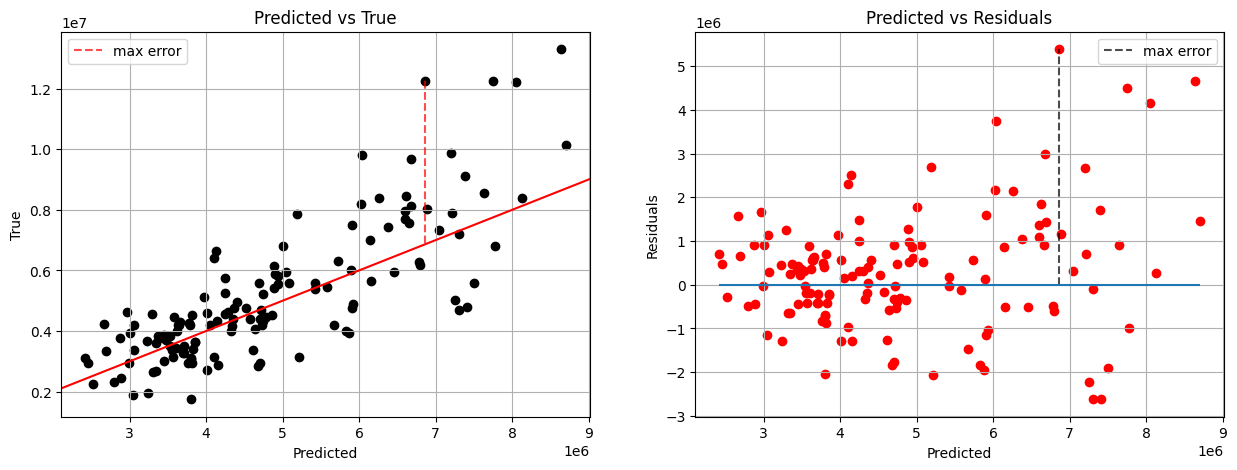

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_A.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [11]:
mask = selected_features2

import pickle
with open('saved_dictionary_a.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,1,1
1,16,airconditioning
2,6,area
3,4,area bathrooms
4,25,area bedrooms
5,10,area stories
6,5,basement
7,7,bathrooms
8,28,bathrooms stories
9,21,bedrooms
